In [16]:
import numpy as np
import matplotlib.pyplot as plt

# PDH Locking

<p align="center">
  <img src="images/pdhlocking.png" width="500"/>
</p>

Systematic and quantitative analysis of residual amplitude modulation in Pound-Drever-Hall frequency stabilization - Scientific Figure on ResearchGate. Available from: https://www.researchgate.net/figure/The-experimental-setup-for-PDH-frequency-locking-P1-and-P2-are-the-polarizers-aligned_fig1_286236886 [accessed 18 Jun 2025]

Beam Path: Laser → P1 → EOM → P2 → PBS → λ/4 → MODE MATCHING LENSES → Cavity (flat-concave)



## ABCD Matrix and Stability Condition for Planar–Concave Subcavity (M2–M3)

We model the section of the cavity between M2 (flat mirror) and M3 (curved mirror) as a planar–concave Fabry–Pérot cavity with length \( L_2 \) and M3 radius of curvature \( R_3 \).

---

### ABCD Matrix Derivation

We build the round-trip matrix as follows:

1. **Forward propagation** through free space of length \( L_2 \):

$$
M_{\text{prop}}(L_2) =
\begin{bmatrix}
1 & L_2 \\
0 & 1
\end{bmatrix}
$$

2. **Reflection** off a curved mirror with radius \( R_3 \):

$$
M_{\text{mirror}}(R_3) =
\begin{bmatrix}
1 & 0 \\
-\frac{2}{R_3} & 1
\end{bmatrix}
$$

3. **Backward propagation** over \( L_2 \):

$$
M_{\text{return}}(L_2) =
\begin{bmatrix}
1 & L_2 \\
0 & 1
\end{bmatrix}
$$

4. **Total round-trip matrix**:

$$
M_{\text{rt}} = M_{\text{return}} \cdot M_{\text{mirror}} \cdot M_{\text{prop}} =
\begin{bmatrix}
1 - \frac{2L_2}{R_3} & 2L_2 - \frac{2L_2^2}{R_3} \\
-\frac{2}{R_3} & 1 - \frac{2L_2}{R_3}
\end{bmatrix}
$$

---

### Stability Condition

The cavity is **stable** if the eigenvalues of $$ M_{\text{rt}} $$ are complex conjugates of unit magnitude. The condition is:

$$
\left| \frac{A + D}{2} \right| < 1
$$

For this matrix:

$$
A = D = 1 - \frac{2L_2}{R_3}
\quad \Rightarrow \quad
\left|1 - \frac{2L_2}{R_3}\right| < 1
$$

Solving:

$$
0 < L_2 < R_3
$$

---

### Gaussian Beam Eigenmode

We assume the cavity supports a Gaussian eigenmode with beam waist located at the **flat mirror** (M2). The complex beam parameter at the waist is:

$$
\tilde{q}_0 = i z_R
\quad \text{where} \quad
z_R = \sqrt{L_2(R_3 - L_2)}
$$

The **waist size** is:

$$
w_0 = \sqrt{ \frac{\lambda}{\pi} \cdot z_R }
= \sqrt{ \frac{\lambda}{\pi} \cdot \sqrt{L_2(R_3 - L_2)} }
$$

The beam radius at the curved mirror (M3) is:

$$
w(L_2) = w_0 \cdot \sqrt{1 + \left( \frac{L_2}{z_R} \right)^2 }
$$

And the **wavefront radius** at M3 is:

$$
R(L_2) = L_2 \left( 1 + \left( \frac{z_R}{L_2} \right)^2 \right) = R_3
$$

---

## Cavity Waist for a Plano-Concave Fabry–Pérot Cavity

Consider a plano-concave cavity with:

- Flat mirror at \( z = 0 \)
- Concave mirror at \( z = L \), with radius of curvature \( R \)
- Laser wavelength 1064 nm

### 1. Stability Condition

$$
0 < L < R
$$

### 2. Rayleigh Range \( z_R \)

The cavity eigenmode has its waist at the flat mirror:

$$
z_R = \sqrt{L(R - L)}
$$

### 3. Waist Size \( w_0 \)

$$
w_0 = \sqrt{ \frac{\lambda}{\pi} z_R }
= \sqrt{ \frac{\lambda}{\pi} \sqrt{L(R - L)} }
$$

### 4. Beam Radius at Curved Mirror

$$
w(L) = w_0 \sqrt{1 + \left( \frac{L}{z_R} \right)^2 }
$$




In [17]:
def cavity_waist(lambda0, L2, Rc):
    """
    Calculate the waist size (w0) and Rayleigh range (zR) of a plano-concave optical cavity.
    
    Parameters:
    lambda0 : float
        Laser wavelength in meters.
    L2 : float
        Cavity length in meters (distance between flat and curved mirror).
    Rc : float
        Radius of curvature of the concave mirror in meters.
    
    Returns:
    w0 : float
        Beam waist size in meters (at the flat mirror).
    zR : float
        Rayleigh range in meters.
    """
    if L2 <= 0 or Rc <= L2:
        raise ValueError("Cavity must satisfy 0 < L < R for stability.")
    
    zR = np.sqrt(L2 * (Rc - L2))
    w0 = np.sqrt((lambda0 / np.pi) * zR)
    
    return w0, zR

In [18]:
def rayleigh_range(w, lamb):
    return np.pi * w**2 / lamb

def q_parameter(z, zR):
    return z + 1j * zR

def propagate_q(q_in, d1, f, d2):
    # ABCD matrices
    M1 = np.array([[1, d1], [0, 1]])
    M2 = np.array([[1, 0], [-1/f, 1]])
    M3 = np.array([[1, d2], [0, 1]])

    M = M3 @ M2 @ M1
    A, B, C, D = M[0, 0], M[0, 1], M[1, 0], M[1, 1]

    return (A * q_in + B) / (C * q_in + D)

def match_quality(q_out, zR_target):
    q_target = 1j * zR_target
    return abs((q_out - q_target) / q_target)

def collimated_beam_diameter(f,mfd,lamb):
    return 4*f*lamb/(np.pi * mfd)


In [19]:
# Input laser parameters
lambda0 = 1064e-9  # laser wavelength in meters
w_in = 0.5e-3      # input waist in meters, dependent on laser specs

# Cavity parameters
Rc = 0.750*2           # ROC of back concave mirror in meters
#L2 = 1.1530612244897958         # large cavity length in meters
L2 = 0.78571
# Target cavity mode
w_target, zR_target = cavity_waist(lambda0, L2, Rc) 


In [20]:
print(f"Target cavity waist: {w_target*1e6:0.3f} microns, zR_target: {zR_target}")

Target cavity waist: 503.709 microns, zR_target: 0.7491493815655192


In [21]:
# Collimated beam diameter after aspheric lens
f = 2e-3
mfd = 6.2e-6 # MFD of FC/APC Single Mode Patch Cables

cbd = collimated_beam_diameter(f,mfd,lambda0)
print(f"Collimated beam diameter after aspheric lens with f = {f*1e3} mm: {cbd*1e6} microns")

Collimated beam diameter after aspheric lens with f = 2.0 mm: 437.00866954781077 microns


In [24]:
# Input beam parameters
zR_in = rayleigh_range(w_in, lambda0)
q_in = q_parameter(0, zR_in)  # waist at z = 0

# Sweep lens focal lengths and positions
focal_lengths = np.linspace(600e-3, 2000e-3, 100)
d1 = 0.1  # distance from laser waist to lens (fixed)
d2 = L2  # distance from lens to cavity waist (fixed)

Min_mismatch = 0.659455548896178


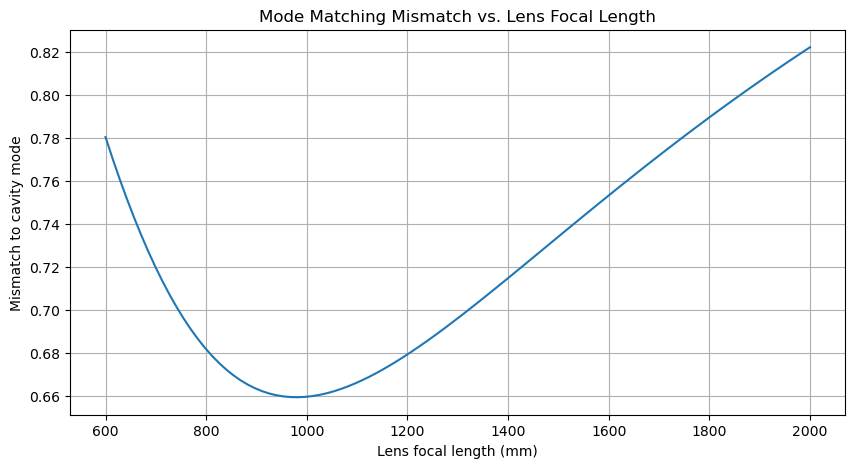

0.9818181818181817

In [26]:
best_match = None
min_mismatch = float('inf')

mismatch_data = []

for f in focal_lengths:
    q_out = propagate_q(q_in, d1, f, d2)
    mismatch = match_quality(q_out, zR_target)
    mismatch_data.append(mismatch)
    if mismatch < min_mismatch:
        min_mismatch = mismatch
        best_match = f
print(f"Min_mismatch = {min_mismatch}")
# Plot match quality
plt.figure(figsize=(10, 5))
plt.plot(focal_lengths * 1e3, mismatch_data)
plt.xlabel("Lens focal length (mm)")
plt.ylabel("Mismatch to cavity mode")
plt.title("Mode Matching Mismatch vs. Lens Focal Length")
plt.grid(True)
plt.show()

best_match

In [ ]:
import numpy as np
# ---------- Core Gaussian utilities ----------
def w_of_z(w0, z, lam):
    zR = np.pi*w0**2/lam
    return w0*np.sqrt(1 + (z/zR)**2)

def q_from_wR(w, R, lam):
    # Build q from width and wavefront radius at a plane
    # 1/q = 1/R - i*lam/(pi w^2)
    invq = (0 if np.isinf(R) else 1/R) - 1j*lam/(np.pi*w**2)
    return 1/invq

def wR_from_q(q, lam):
    invq = 1/q
    R = np.inf if np.isclose(invq.real, 0.0) else 1/invq.real
    w = np.sqrt(-lam/(np.pi*invq.imag))
    return w, R

def propagate_q_free(q, L):
    # ABCD of free space: [[1, L],[0,1]]
    return q + L

def overlap_eta(w1, R1, w2, R2, lam):
    term_w = (w1/w2 + w2/w1)**2
    term_R = ((np.pi*w1*w2/lam)*( (0 if np.isinf(R1) else 1/R1) - (0 if np.isinf(R2) else 1/R2) ))**2
    return 4.0/(term_w + term_R)

# ---------- Examples you can tailor to your variables ----------
lam = 1064e-9      # wavelength [m]
L2  = 0.78571        # concave distance from waist [m] (example)
w0  = w_target        # intracavity waist at flat mirror [m] (example)

# 3) q at mirrors and transmitted beam parameters
# q at waist (z=0 inside): q = i zR
zR = np.pi*w0**2/lam
q_waist = 1j*zR
q_concave_in = propagate_q_free(q_waist, L2)  # just inside concave mirror

# Immediately outside the mirror, set z=0 at surface:
# For thin mirror, take the same q as a starting plane in air
q_out0 = q_concave_in
w0_ext, R0_ext = wR_from_q(q_out0, lam)  # beam width and wavefront radius at the mirror surface (outside)
# External waist size/position:
z0_ext = -np.real(q_out0)                 # waist location relative to the surface (z positive going forward)
w_ext_waist = np.sqrt(lam*np.imag(q_out0)/np.pi)

# 4) Mode matching at the input (example: compare your designed input beam vs cavity mode at input plane)
# Suppose your launched beam at the flat mirror has (w_in, R_in)
w_in = 0.0055
R_in = np.inf  # nearly collimated at the input plane, for example
# Cavity mode at the same plane (flat mirror): w = w0, R = ∞
eta = overlap_eta(w_in, R_in, w_flat, np.inf, lam)


In [33]:

# 1) Intracavity mirror spots
w_flat = w_of_z(w0, 0.0, lam)
w_concave = w_of_z(w0, L2, lam)
print(f"{w_flat=},{w_concave=}")

w_flat=0.0005037094403137065,w_concave=0.0007299421371966874


Text(0.5, 1.0, 'Axial profile')

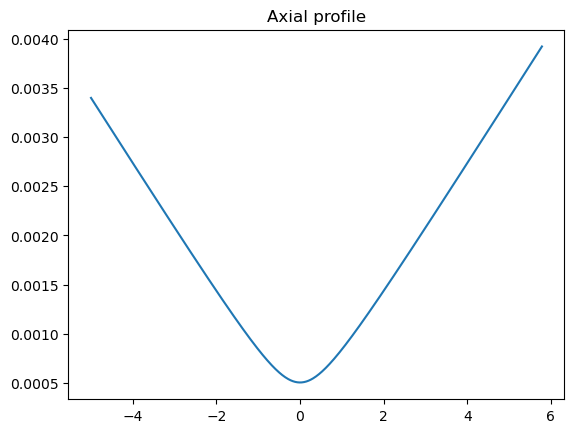

In [29]:
# 2) Axial profile for plotting
z = np.linspace(-5, L2+5, 600)   # 5 m before waist to 5 m past concave, adjust as needed
wz = w_of_z(w0, z, lam)
plt.plot(z,wz)
plt.title("Axial profile")